<a href="https://colab.research.google.com/github/amanjaiswal73892/changemypet/blob/master/MSE_average_losses_ensemble_gif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True).eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [ ]:
model2 = torch.hub.load('pytorch/vision:v0.6.0', 'fcn_resnet101', pretrained=True).eval()


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!git clone "https://github.com/amanjaiswal73892/changemypet.git"

Cloning into 'changemypet'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 47 (delta 8), reused 27 (delta 1), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [ ]:
# sample execution (requires torchvision)
from PIL import Image, ImageOps
from torchvision import transforms

input_image = Image.open('/content/dog_4.jpg')
preprocess = transforms.Compose([
    transforms.Resize(512),
    transforms.CenterCrop(512),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)

input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
    model2.to('cuda')
# ouput_original_image = output.argmax(0).float()

tensor([[[-0.7308, -0.6281, -0.6281,  ..., -1.0562, -1.0390, -0.8507],
         [-0.8678, -0.9020, -0.8849,  ..., -1.1247, -1.1075, -1.0733],
         [-1.0390, -0.9705, -0.9534,  ..., -1.0904, -1.0733, -1.0904],
         ...,
         [ 0.1426, -0.0801, -0.3027,  ...,  0.3481,  0.2967,  0.1768],
         [ 0.2967,  0.2111,  0.1939,  ...,  0.1939,  0.2111,  0.2624],
         [ 0.0227,  0.0741,  0.1768,  ...,  0.1254,  0.0227, -0.0116]],

        [[-0.4426, -0.3550, -0.3025,  ..., -0.7227, -0.7577, -0.5126],
         [-0.5301, -0.5126, -0.5301,  ..., -0.6527, -0.7577, -0.7052],
         [-0.6702, -0.5826, -0.5826,  ..., -0.6176, -0.6527, -0.7227],
         ...,
         [ 0.7304,  0.5028,  0.1352,  ...,  0.8004,  0.7829,  0.5203],
         [ 0.7479,  0.6779,  0.5378,  ...,  0.6254,  0.6604,  0.6254],
         [ 0.3277,  0.4328,  0.5028,  ...,  0.2752,  0.1877,  0.2402]],

        [[-0.4624, -0.3230, -0.3230,  ..., -1.0550, -0.8981, -0.7064],
         [-0.6367, -0.5844, -0.5495,  ..., -1

In [ ]:
from changemypet.src.biggan import BigGAN512
import torch 
import torchvision
from scipy.stats import truncnorm
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [ ]:
truncation = torch.clamp(torch.tensor(0.4), min=0.02+1e-4, max=1.0-1e-4).float()  # truncation is 0.4
c = torch.tensor((202,)).long()  # class_label is 260
z = truncation * torch.as_tensor(truncnorm.rvs(-2.0, 2.0, size=(1, 128),random_state=2)).float()
# z1 = truncation * torch.as_tensor(truncnorm.rvs(-2.0, 2.0, size=(1, 128),random_state=16)).float()
z.requires_grad = True

biggan = BigGAN512()

biggan.load_state_dict(torch.load("/content/drive/My Drive/biggan/biggan512-release.pt"))

<All keys matched successfully>

In [ ]:
def softXEnt (input, target ):
    logprobs = torch.nn.functional.log_softmax (input, dim = 0)
    return  -(target * logprobs).sum() / (input.shape[1]*input.shape[2])

In [ ]:
def MSE_Loss (input, target):
  loss = torch.nn.MSELoss()
  return loss(input, target)

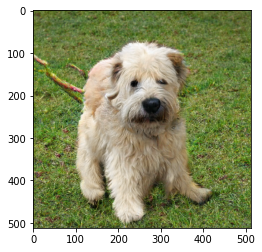

In [ ]:
biggan.eval()
img = biggan(z, c, truncation.item())
pil = torchvision.transforms.ToPILImage()((0.5 * (img.data + 1)).squeeze())
# pil = torchvision.transforms.ToPILImage()((img).squeeze())
import PIL
# pil=ImageOps.mirror(pil)
# pil=pil.transpose(PIL.Image.ROTATE_90)
plt.imshow(pil)
# pil.save("dog_translate.png")

In [ ]:
def get_concat_h(im1, im2):
    dst_h = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst_h.paste(im1, (0, 0))
    dst_h.paste(im2, (im1.width, 0))
    return dst_h

def get_concat_v(im1, im2):
    dst_v = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst_v.paste(im1, (0, 0))
    dst_v.paste(im2, (0, im1.height))
    return dst_v



Epoch :  1
Loss  :  0.13884153962135315


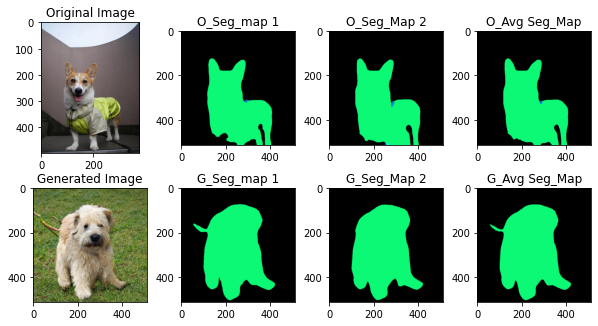

----------------------------------------------------------------------------------------------------
Epoch :  2
Loss  :  0.13432012498378754


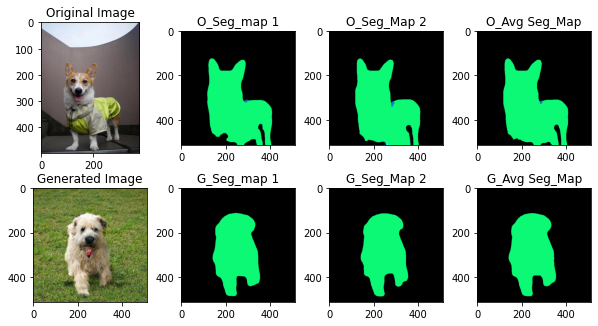

----------------------------------------------------------------------------------------------------
Epoch :  3
Loss  :  0.11426031589508057


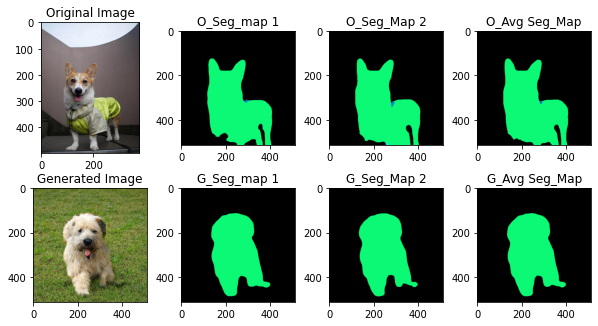

----------------------------------------------------------------------------------------------------
Epoch :  4
Loss  :  0.09149549901485443


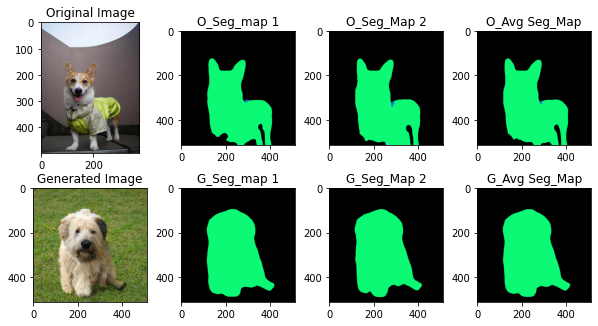

----------------------------------------------------------------------------------------------------
Epoch :  5
Loss  :  0.0884973406791687


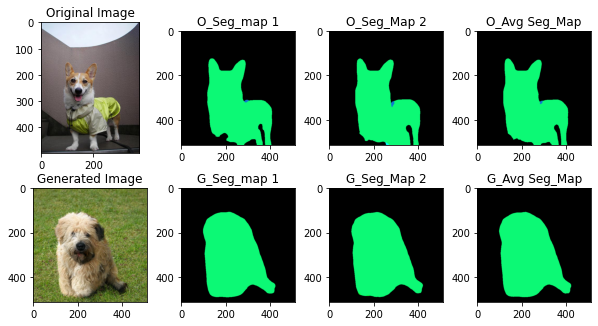

----------------------------------------------------------------------------------------------------
Epoch :  6
Loss  :  0.08408757299184799


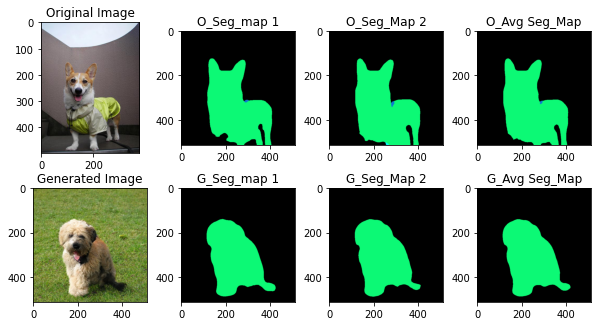

----------------------------------------------------------------------------------------------------
Epoch :  7
Loss  :  0.06623560935258865


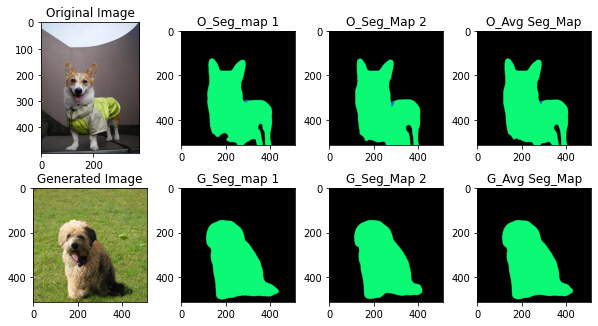

----------------------------------------------------------------------------------------------------
Epoch :  8
Loss  :  0.06825132668018341


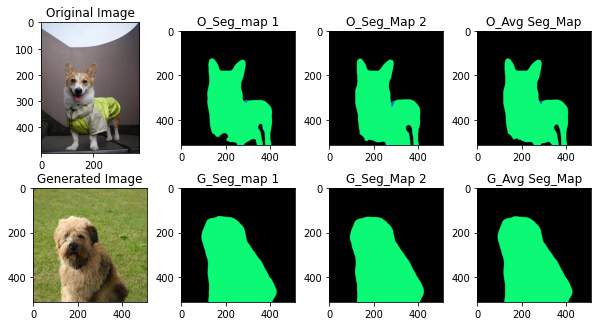

----------------------------------------------------------------------------------------------------
Epoch :  9
Loss  :  0.060680635273456573


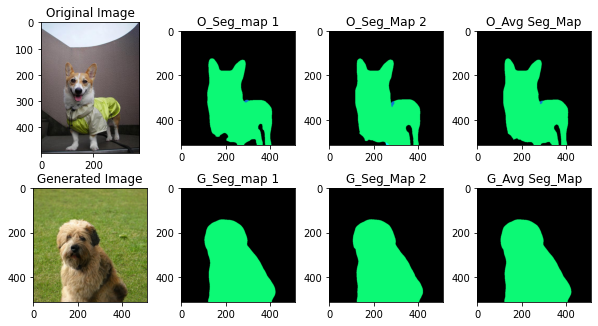

----------------------------------------------------------------------------------------------------
Epoch :  10
Loss  :  0.0573674812912941


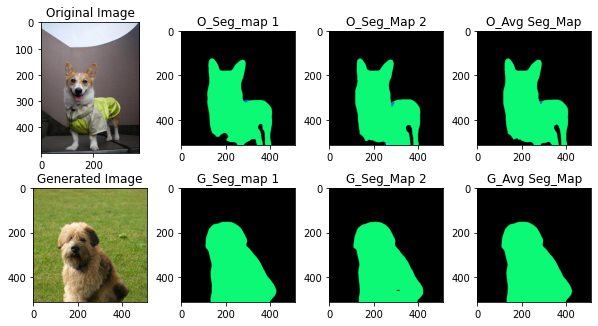

----------------------------------------------------------------------------------------------------
Epoch :  11
Loss  :  0.05496378242969513


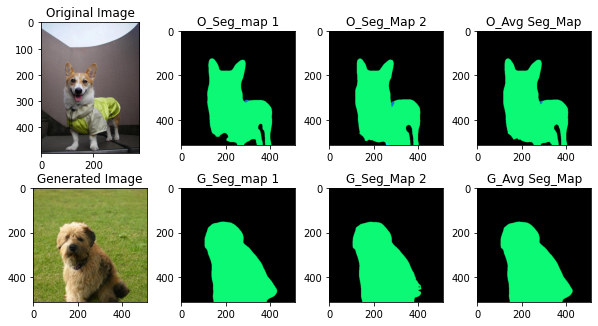

----------------------------------------------------------------------------------------------------
Epoch :  12
Loss  :  0.052860647439956665


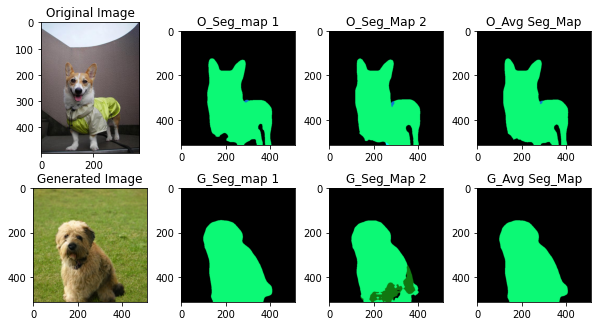

----------------------------------------------------------------------------------------------------
Epoch :  13
Loss  :  0.0604916587471962


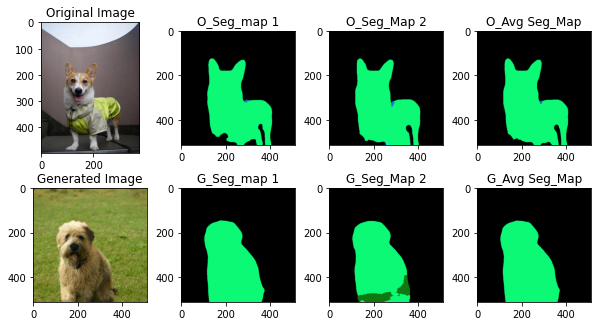

----------------------------------------------------------------------------------------------------
Epoch :  14
Loss  :  0.055902138352394104


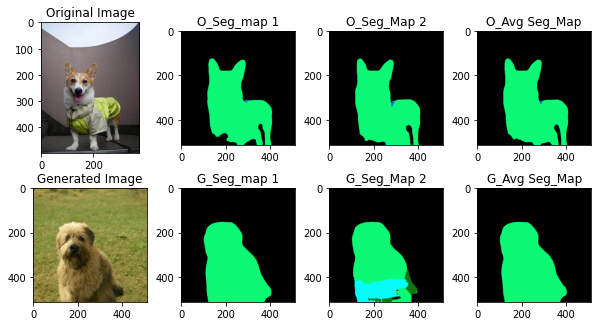

----------------------------------------------------------------------------------------------------
Epoch :  15
Loss  :  0.046535417437553406


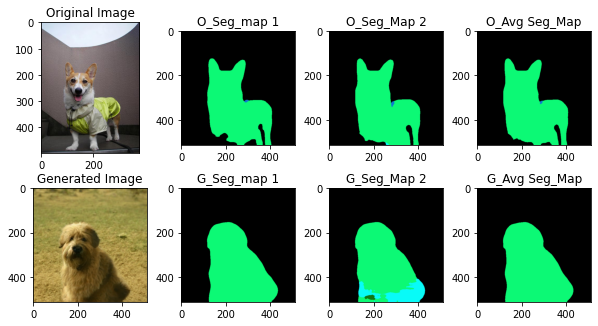

----------------------------------------------------------------------------------------------------
Epoch :  16
Loss  :  0.06752137839794159


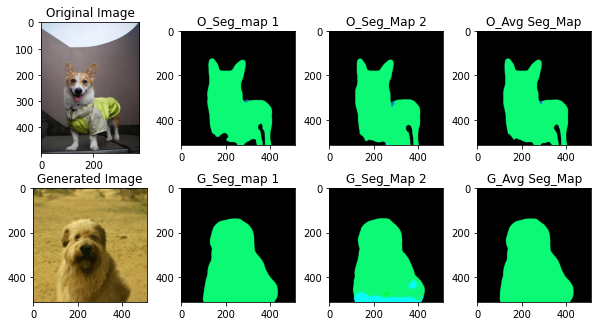

----------------------------------------------------------------------------------------------------
Epoch :  17
Loss  :  0.06878215074539185


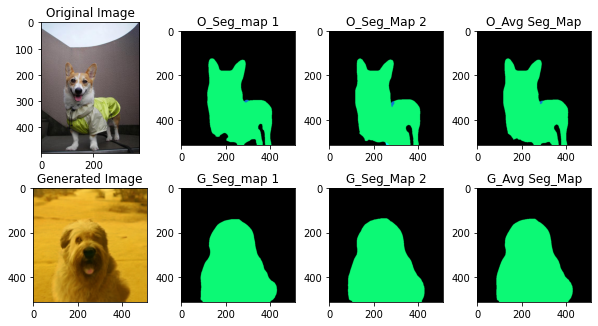

----------------------------------------------------------------------------------------------------
Epoch :  18
Loss  :  0.0722837746143341


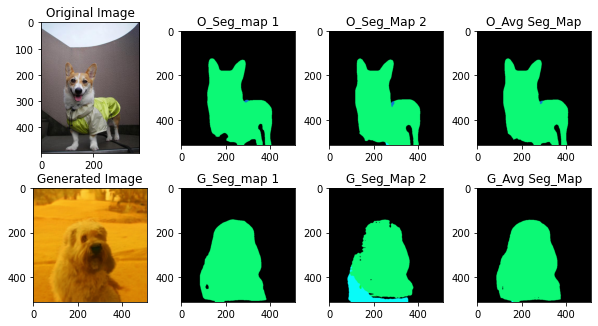

----------------------------------------------------------------------------------------------------
Epoch :  19
Loss  :  0.08848628401756287


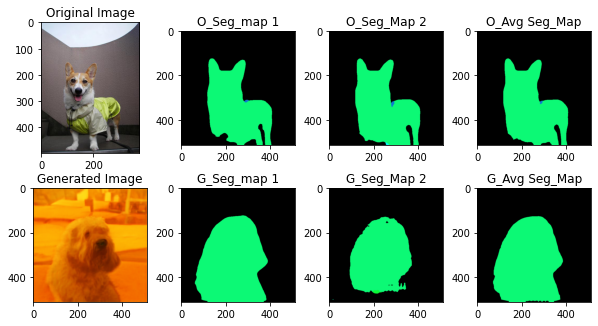

----------------------------------------------------------------------------------------------------
Epoch :  20
Loss  :  0.09904520213603973


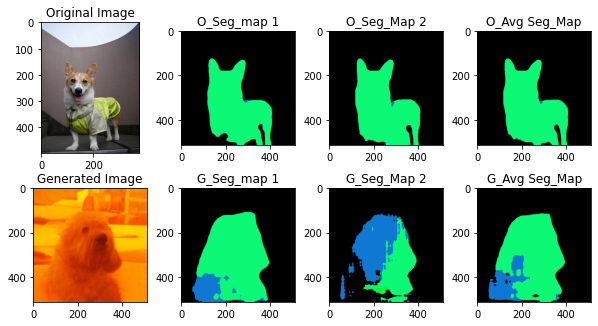

----------------------------------------------------------------------------------------------------
End


In [ ]:
gif = []
biggan.eval()
# optimizer = torch.optim.AdamW([z], lr=0.1)
optimizer = torch.optim.AdamW([z], lr=1e-1, betas=(0.5, 0.999))

# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

for i in range(20):
    with torch.enable_grad():
        optimizer.zero_grad()
        img = biggan(z, c, truncation.item())
        
        #Segmentation of Predicted Img
        output_predicted_image_1 = model(0.5 * (img.cuda() + 1))['out'][0]
        output_predicted_image_2 = model2(0.5 * (img.cuda() + 1))['out'][0]
        
        #applying softmax on predicted imgs segmaps
        output_predicted_image_1_s = torch.nn.functional.softmax (output_predicted_image_1, dim = 0) #softmax o_P1
        output_predicted_image_2_s = torch.nn.functional.softmax (output_predicted_image_2, dim = 0) #softmax o_P2
        
        #take average of 2 predicted img segmaps
        output_p = (output_predicted_image_1_s * 0.6) + (output_predicted_image_2_s * 0.4)  # softmax_predicted_output_average
        
        #Segmentation of Original Img
        output_original_image_1 = model(input_batch)['out'][0]
        output_original_image_2 = model2(input_batch)['out'][0]
        
        #applying softmax on original imgs segmaps
        output_original_image_1_s=torch.nn.functional.softmax (output_original_image_1, dim = 0) #softmax o_o_1
        output_original_image_2_s=torch.nn.functional.softmax (output_original_image_2, dim = 0) #softmax o_o_2
        
        #take average of 2 original img segmaps
        output_o = (output_original_image_1_s + output_original_image_2_s)/2 # softmax_original_output_average

        # output_o = output_o[12]

        # Target image segmaps
        # target = torch.nn.functional.softmax (output_o[[0,12]], dim = 0) # softmax on the target 
        target = output_o[12]

        # seg_1 = output_predicted_image_1_s[12]
        # seg_2 = output_predicted_image_2_s[12]

        # loss1 = MSE_Loss(seg_1, target)
        # loss2 = MSE_Loss(seg_1, target)
       

        cost_x = MSE_Loss(output_p[12],target)

        print("Epoch : ",i+1)
        print("Loss  : ", cost_x.item())


    fig = plt.figure(figsize=(10,5))
    plt.subplots_adjust(left = 0.125,right = 0.9,top=0.9,bottom = 0.1,wspace = 0.3,hspace = 0.2)

    ax1 = fig.add_subplot(241)
    ax1.title.set_text('Original Image')
    plt.imshow(input_image)

    ax2 = fig.add_subplot(242)
    ax2.title.set_text('O_Seg_map 1')
    r = Image.fromarray(model(input_batch)['out'][0].argmax(0).float().byte().cpu().numpy())#.resize(input_image.size)
    r.putpalette(colors)
    plt.imshow(r)
     
    ax3 = fig.add_subplot(243)
    ax3.title.set_text('O_Seg_Map 2')
    r = Image.fromarray(model2(input_batch)['out'][0].argmax(0).float().byte().cpu().numpy())#.resize(input_image.size)
    r.putpalette(colors)
    plt.imshow(r)

    ax4 = fig.add_subplot(244)
    ax4.title.set_text('O_Avg Seg_Map')
    seg_map_o = Image.fromarray(output_o.argmax(0).float().byte().cpu().numpy())
    seg_map_o.putpalette(colors)
    plt.imshow(seg_map_o)

    

    ax5 = fig.add_subplot(245)
    ax5.title.set_text('Generated Image')
    pil_gen = torchvision.transforms.ToPILImage()((0.5 * (img.data + 1)).squeeze())
    plt.imshow(pil_gen)

    ax6 = fig.add_subplot(246)
    ax6.title.set_text('G_Seg_map 1')
    r = Image.fromarray(output_predicted_image_1.argmax(0).float().byte().cpu().numpy())
    r.putpalette(colors)
    plt.imshow(r)

    ax7 = fig.add_subplot(247)
    ax7.title.set_text('G_Seg_Map 2')
    r = Image.fromarray(output_predicted_image_2.argmax(0).float().byte().cpu().numpy())
    r.putpalette(colors)
    plt.imshow(r)

 
    ax8 = fig.add_subplot(248)
    ax8.title.set_text('G_Avg Seg_Map')
    seg_map_gen = Image.fromarray(output_p.argmax(0).float().byte().cpu().numpy())
    seg_map_gen.putpalette(colors)
    plt.imshow(seg_map_gen)
    hz_1 = get_concat_h(input_image,pil_gen)
    hz_2 = get_concat_h(seg_map_o,seg_map_gen)
    v = get_concat_v(hz_1,hz_2)
    gif.append(v)
    plt.show()

    print('-'*100)
    cost_x.backward()
    optimizer.step()

print('End')

In [ ]:
gif[0].save('out.gif', save_all=True, append_images=gif[1:],optimize=False, duration=150, loop=0)

In [ ]:
gif_2 = []
for x in gif:
  im = x
  (width, height) = (im.width // 2, im.height // 2)
  im_resized = im.resize((width, height))
  gif_2.append(im_resized)
gif_2[0].save('out_resized.gif', save_all=True, append_images=gif_2,optimize=False, duration=250, loop=0)